In [70]:
# Amia Yi
# Group: Kevin Fan
# CMSC320 0201
# UID 118753201

In [71]:
# imports
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import style
style.use('fivethirtyeight')

In [72]:
# part 1
# this code starts up sqlite with the 2014 baseball dataset
# and joins the teams and salaries tables via year and team IDs to
# create a pandas dataframe with franchise ID, win percentages, wins, total games, and total salary paid
# per year and team combination

# sqlite setup
sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)

In [73]:
# table setup with SQL code
# there does not appear to be any missing data in relevant rows for this table - all team and player
# salaries are filled out in the original table, along with franchise IDs, wins and games




# (KEVIN HELP HELPPPPPP I DONT KNOW WHY ITS ASKING THIS I DONT EVEN KNOW HOW ID CHECK FOR MISSING DATA




query = """SELECT t.yearID, t.teamID, t.franchID as franchiseID, (t.W * 1.0 / t.G * 100) as winning_percentage, t.W as wins, t.G as games,
            sum(s.salary) as total_salary
            FROM Teams as t
            JOIN Salaries as s ON t.yearID = s.yearID AND t.teamID = s.teamID
            WHERE t.yearID >= 1990
            GROUP BY t.yearID, t.teamID"""
# put into pandas dataframe and display
df = pd.read_sql(query, conn)
df


,yearID,teamID,franchiseID,winning_percentage,wins,games,total_salary
0,1990,ATL,ATL,40.123457,65,162,14555501.0
1,1990,BAL,BAL,47.204969,76,161,9680084.0
2,1990,BOS,BOS,54.320988,88,162,20558333.0
3,1990,CAL,ANA,49.382716,80,162,21720000.0
4,1990,CHA,CHW,58.024691,94,162,9491500.0
...,...,...,...,...,...,...,...
723,2014,SLN,STL,55.555556,90,162,120693000.0
724,2014,TBA,TBD,47.530864,77,162,72689100.0
725,2014,TEX,TEX,41.358025,67,162,112255059.0
726,2014,TOR,TOR,51.234568,83,162,109920100.0


Write code to produce plots that illustrate the distribution of payrolls across teams conditioned on time (from 1990-2014). 

It will be a single plot with a line for each team. It is a plot between payroll on the y-axis and year (1990 - 2014) on the x-axis

TypeError: mean() missing 1 required positional argument: 'a'

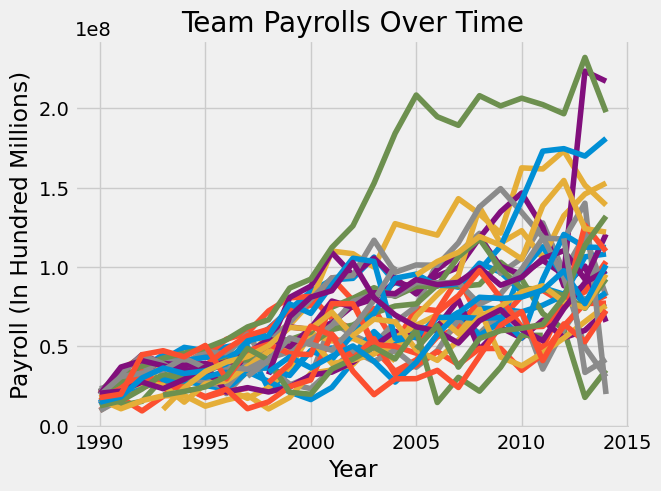

In [74]:
slopes = []
for team in df['teamID'].unique():
    #form lists of salaries from each team and map them to correct dates - can prob df.plot(kind = 'line')
    x = list(df.loc[df['teamID'] == team, 'yearID'])
    y = list(df.loc[df['teamID'] == team, 'total_salary'])
    m, b = np.polyfit(x, y, 1)
    slopes.append(m)
    plt.plot(x, y)
    plt.title('Team Payrolls Over Time')
    plt.xlabel('Year')
    plt.ylabel('Payroll (In Hundred Millions)')
    plt.show
avg_slopes = np.mean(slopes)

#### Question 1

What statements can you make about the distribution of payrolls conditioned on time based on these plots? Remember you can make statements in terms of central tendency, spread, etc.

In [ ]:
print("There is a general tendency for team payrolls to increase over time, as there is a positive correlation between year and payroll.")
print(f'This is evidenced by the mean slope of all regression lines pertaining to team payrolls over time being {np.round(avg_slopes, 2)}.')
print("The positive number indicates a strong positive relation.")

There is a general tendency for team payrolls to increase over time, as there is a positive correlation between year and payroll.
This is evidenced by the mean slope of all regression lines pertaining to team payrolls over time being 2364380.73.
The positive number indicates a strongly positive relation.


In [ ]:
# problem 3

# this code produces a graph of mean team payroll over time by taking the mean of
# all team payrolls per year from the dataframe and grpahing it with matplotlib

plt.clf()
x = []
y = []
for year in df['yearID'].unique():
    # get average of team payroll per year and put on plot
    x.append(year)
    y.append(np.average(list(df.loc[df['yearID'] == year, 'total_salary'])))
plt.plot(x, y)
plt.title('Average Payroll Over Time')
plt.xlabel('Year')
plt.ylabel('Payroll (In Hundred Millions)')
plt.show